In [25]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import gower
import matplotlib
import matplotlib.pyplot as plt
import os

# Подготовим данные

In [26]:
#  Импорт данных
df = pd.read_csv("bank.csv", sep=";",  decimal=",")

In [27]:
# Посмотрим на данные 
df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,blue-collar,married,secondary,no,0,yes,no,no


In [28]:
print(df)

     age          job  marital  education default  balance housing loan   y
0     30   unemployed  married    primary      no     1787      no   no  no
1     33     services  married  secondary      no     4789     yes  yes  no
2     35   management   single   tertiary      no     1350     yes   no  no
3     30   management  married   tertiary      no     1476     yes  yes  no
4     59  blue-collar  married  secondary      no        0     yes   no  no
..   ...          ...      ...        ...     ...      ...     ...  ...  ..
393   59    housemaid  married    primary      no        0      no   no  no
394   38  blue-collar  married  secondary      no     1370     yes   no  no
395   58   management  married  secondary      no       37      no   no  no
396   34   management   single   tertiary      no      673     yes  yes  no
397   40     services  married  secondary      no     -342     yes   no  no

[398 rows x 9 columns]


In [29]:
# удалим строки с пустыми значениями
df=df.dropna()
df

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,blue-collar,married,secondary,no,0,yes,no,no
...,...,...,...,...,...,...,...,...,...
393,59,housemaid,married,primary,no,0,no,no,no
394,38,blue-collar,married,secondary,no,1370,yes,no,no
395,58,management,married,secondary,no,37,no,no,no
396,34,management,single,tertiary,no,673,yes,yes,no


In [30]:
# проведем быстрый анализ данных для понимания их распределения.
df.describe()

,age,balance
count,398.000000,398.000000
mean,40.625628,1603.168342
std,10.290151,3006.880560
min,20.000000,-1680.000000
25%,33.000000,90.000000
50%,38.000000,462.000000
75%,48.000000,1789.250000
max,78.000000,26965.000000


Очевидно, данные столбца balance имеют большие значения, онтносительно других столбцов. Необходима стандартизация.

# One-hot encoding


In [31]:
# Выбор категориальных данных для One-hot encoding
one_hot_cols = df.select_dtypes(include=['object']).columns
one_hot = pd.get_dummies(df[one_hot_cols])
#Выбираются все столбцы содержащие категориальные данные (тип данных "object") из исходного датафрейма df. 
#Эти столбцы сохраняются в переменную one_hot_cols.
#Затем выполняется код pd.get_dummies(df[one_hot_cols]), который преобразует категориальные данные в бинарные флаги, используя метод One-hot encoding. 
#Результат сохраняется в новый датафрейм one_hot.

# Выбор категориальных данных для Label encoding
#label_cols = df.select_dtypes(include=['object', 'category']).columns
#df[label_cols] = df[label_cols].astype('category')
#df[label_cols] = df[label_cols].apply(lambda x: x.cat.codes)

# Объединение исходного датафрейма с закодированными данными
df = pd.concat([df, one_hot], axis=1)
df = df.drop(one_hot_cols, axis=1)

In [11]:
df

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,30,1787,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,33,4789,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0
2,35,1350,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0
3,30,1476,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,1,0
4,59,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,59,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
394,38,1370,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
395,58,37,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
396,34,673,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,1,0


## Стандартизация

In [32]:
# Стандартизация переменных
from sklearn import preprocessing

#norm = preprocessing.StandardScaler()
#norm.fit(df)
#X = norm.transform(df)

scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
X = scaler.transform(df)

# Иерархическая кластеризация

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2324\4073277305.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(data_dist, method='complete')


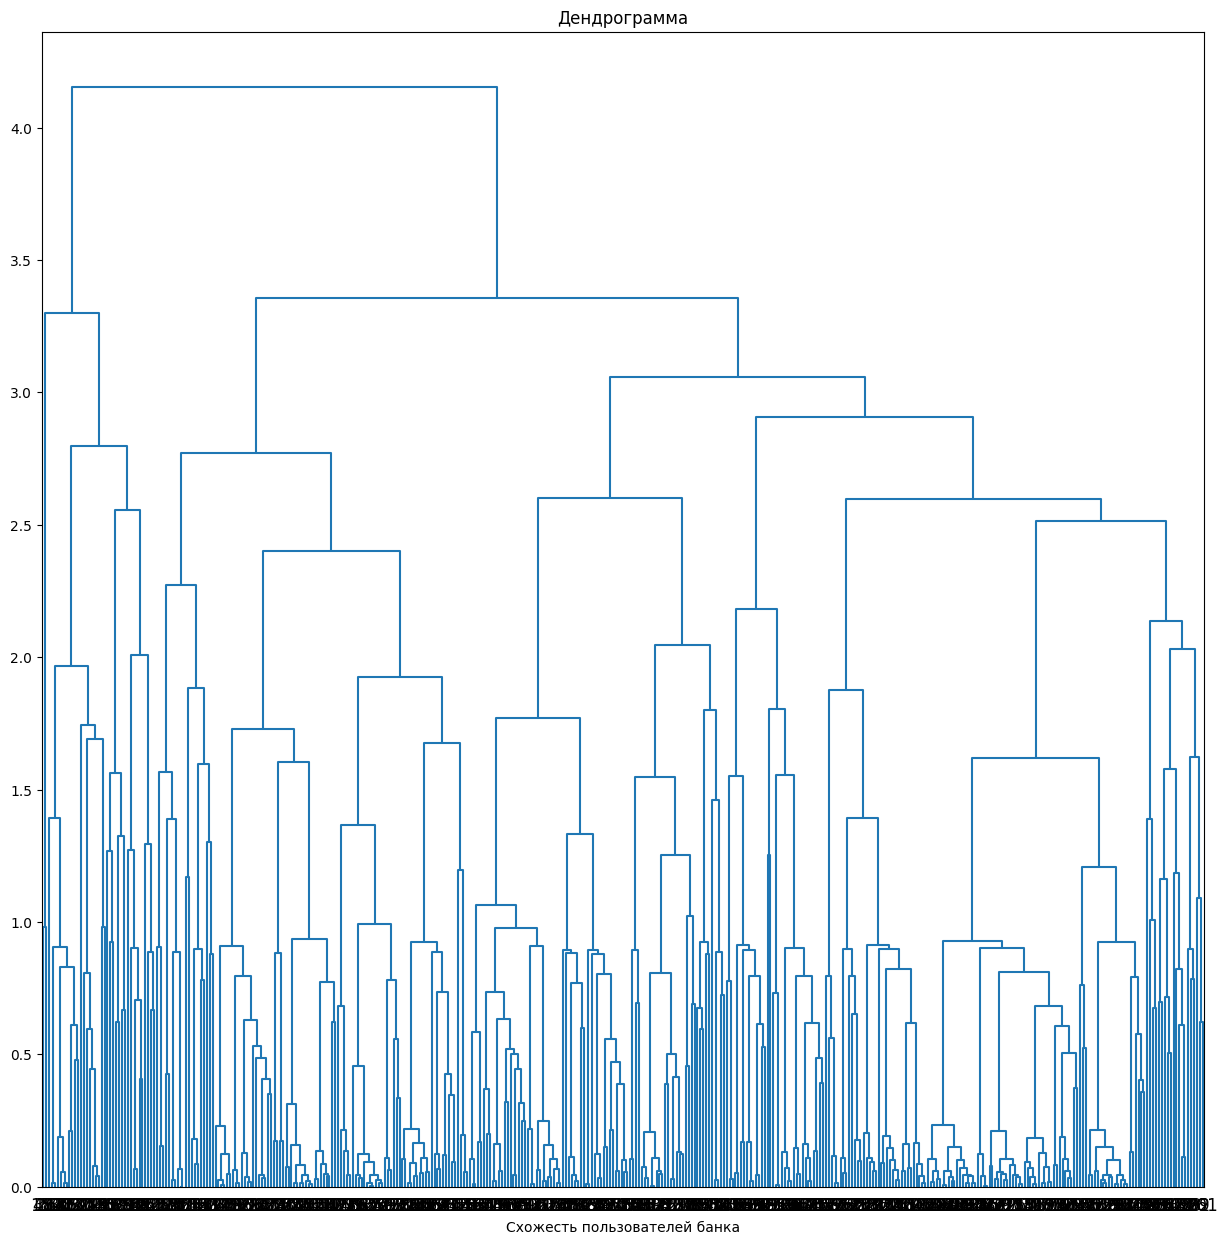

In [36]:
#Кластерный анализ
data_dist = gower.gower_matrix(X)
link = linkage(data_dist, method='complete')
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть пользователей банка')
ax1.set_title('Дендрограмма')

dn = dendrogram(link,
                leaf_font_size = 12,
                color_threshold=-1,
                leaf_rotation=0.)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2324\3766188974.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(data_dist, method='complete')


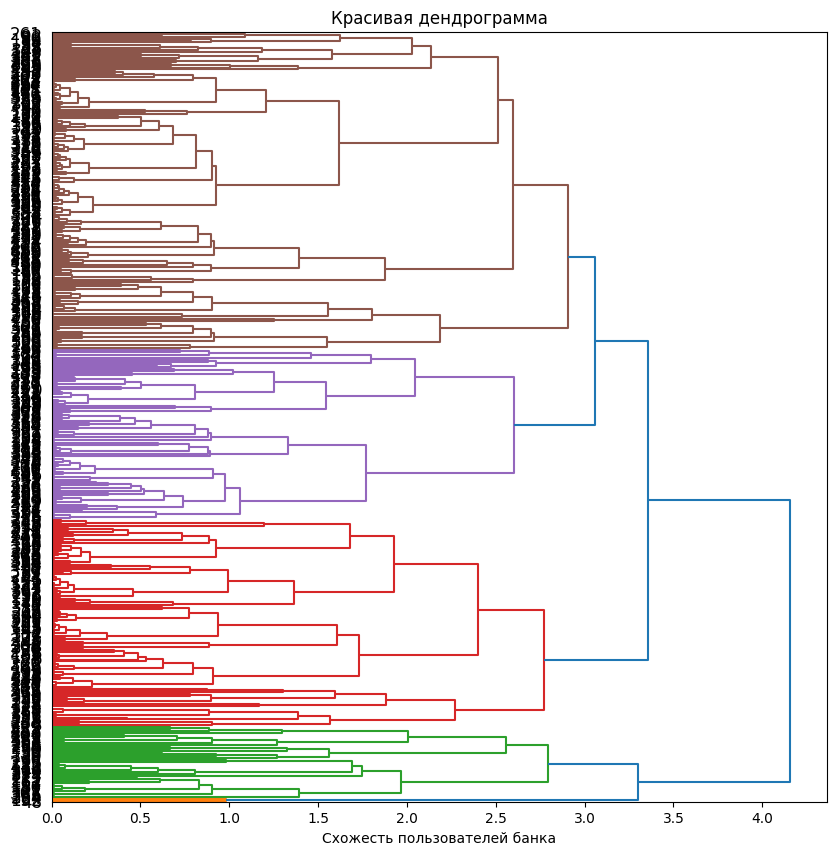

In [37]:
data_dist = gower.gower_matrix(X)

link = linkage(data_dist, method='complete')
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть пользователей банка')

ax1.set_title('Красивая дендрограмма')
#построим более красивую дендрограмму
dn = dendrogram(link,
                leaf_font_size = 12, 
                # опция для красивого отображения слишком ветвистой дендрограммы
                # truncate_mode='lastp',
                # при расстоянии, большем 1.5, разделяем на кластеры
                color_threshold=3,
                # повернуть дендрограмму
                orientation = "right",
                leaf_rotation=0.)

## Построение каменистой осыпи

Text(0, 0.5, 'Расстояние')

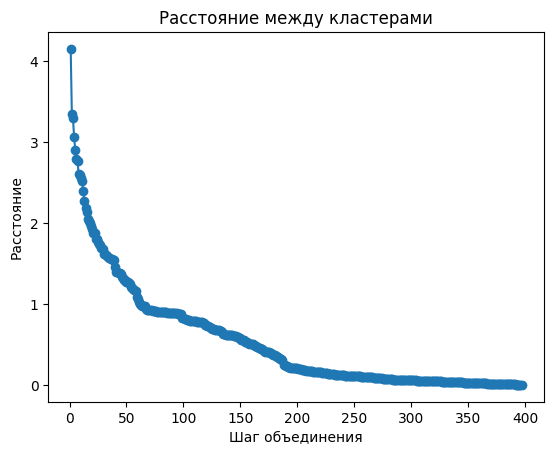

In [38]:
# Построение каменистой осыпи
dist = link[:, 2]
dist_rever = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rever, marker='o')
plt.title('Расстояние между кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old be

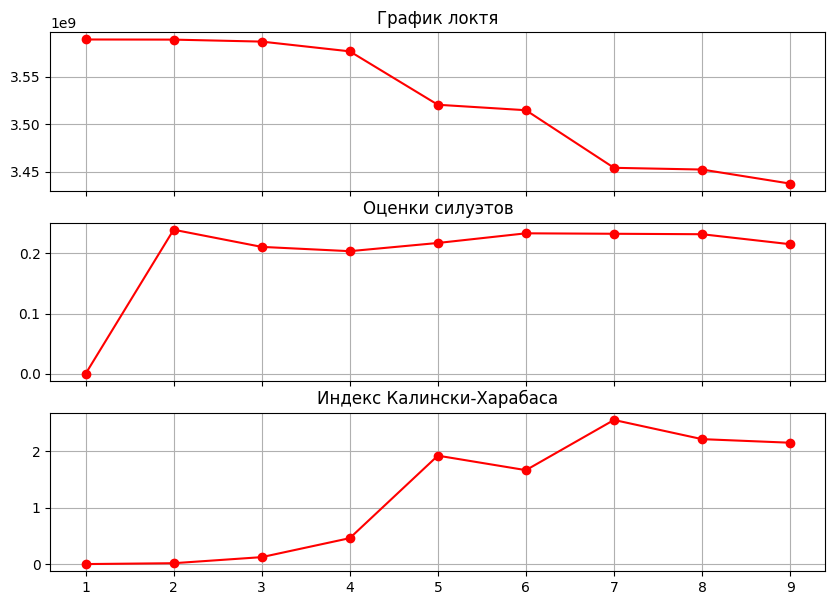

In [49]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
#@title code
y = []
z = [0]
d = [0]
l = 10
x = [i for i in range(1, l)]
for k in range(1, l):
    clusters=fcluster(link, k, criterion='maxclust')
    wss_clusters = []
    for i in range(1, k+1):
        wss_i = np.sum((df.loc[clusters == i] - np.mean(df.loc[clusters == i], axis=0))**2)
        wss_clusters.append(wss_i)
    if k != 1:
      d.append(calinski_harabasz_score(df, clusters))
      z.append(silhouette_score(data_dist, clusters, metric="precomputed"))
    # Calculate total WSS
    total_wss = np.sum(wss_clusters)
    y.append(total_wss)

plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(x, y, 'or-')
plt.grid()
plt.title("График локтя")
plt.tick_params(labelbottom=False)

plt.subplot(3, 1, 2)
plt.grid()
plt.title("Оценки силуэтов")
plt.plot(x, z, 'or-')
plt.tick_params(labelbottom=False)

plt.subplot(3, 1, 3)
plt.grid()
plt.title("Индекс Калински-Харабаса")
plt.plot(x, d, 'or-')
#Индекс Калински-Харабаша является одним из показателей оценки алгоритмов кластеризации, используется для оценки правильности разделения с помощью алгоритма кластеризации K -средних


Мы видим, что наилучшим вариантом будет разделение на 5 кластеров. 

In [50]:
#Теперь посмотрим как произошло распределение на 5 кластера. 
df['cluster'] = fcluster(link, 5, criterion='maxclust')

In [51]:
df.groupby('cluster').mean()

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
cluster,,,,,,,,,,,,,,,,,,,,,
1,38.500000,-549.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
2,38.270270,1779.270270,0.081081,0.189189,0.027027,0.027027,0.135135,0.081081,0.054054,0.054054,...,0.297297,0.027027,0.945946,0.054054,1.000000,0.000000,0.567568,0.432432,0.459459,0.540541
3,38.429907,1714.177570,0.065421,0.009346,0.056075,0.009346,0.551402,0.018692,0.056075,0.018692,...,0.981308,0.018692,0.971963,0.028037,0.420561,0.579439,0.878505,0.121495,0.925234,0.074766
4,44.977273,2192.795455,0.056818,0.215909,0.022727,0.045455,0.113636,0.079545,0.068182,0.090909,...,0.045455,0.034091,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.886364,0.113636
5,40.280488,1200.871951,0.189024,0.347561,0.018293,0.012195,0.060976,0.042683,0.030488,0.103659,...,0.000000,0.060976,0.987805,0.012195,0.085366,0.914634,0.762195,0.237805,0.945122,0.054878



В 1м кластере минимальный баланс. 50% составляют предприниматели. Объявляли дефолт. У всех естьсвоё жильё. Есть кредиты, новый кредит не выдавать.
Во 2м большой баланс, 30% имеют высшее образование. Дефолты происходили только в 5% случаев. Нет своего жилья, у 56% нет других кредитов, поэтому 54% респодентов из этого кластера получат одобрение и отдадут кредит.
В 3м кластере, почти все имеют высшее образование, почти не было дефолтов, у 87% есть кредиты, у 57% свое жилье, но только 7% отдадут кредит.
В 4м кластере средний возраст респондентов наибольший как и баланс, 35% рабочий класс. Дефолтов практически не случалось. У большинства свои дома.Только 25% входящих в кластер имеют текущие кредиты. Однако вероятность того, что вернут новый кредит не велика и поэтому одобрят только чуть больше 11% заявок.
В 5м кластере 18% администраторы и 35% - голубые воротнички, 10% работают в сфере обслуживания. Никто не имеет высшего образования.  У большинства есть кредиты и отказ в новом - 95%

In [52]:
#  Выведем состав каждого кластера
df['cluster'].sort_values()

48     1
152    1
279    2
235    2
270    2
      ..
267    5
268    5
269    5
123    5
397    5
Name: cluster, Length: 398, dtype: int32

# Кластеризация методом K-means

In [58]:
df1 = df.drop(columns = ['cluster'],axis = 1)
df1

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,30,1787,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1,33,4789,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,False,True,True,False
2,35,1350,False,False,False,False,True,False,False,False,...,True,False,True,False,False,True,True,False,True,False
3,30,1476,False,False,False,False,True,False,False,False,...,True,False,True,False,False,True,False,True,True,False
4,59,0,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,59,0,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
394,38,1370,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
395,58,37,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
396,34,673,False,False,False,False,True,False,False,False,...,True,False,True,False,False,True,False,True,True,False


In [59]:
from sklearn.cluster import KMeans

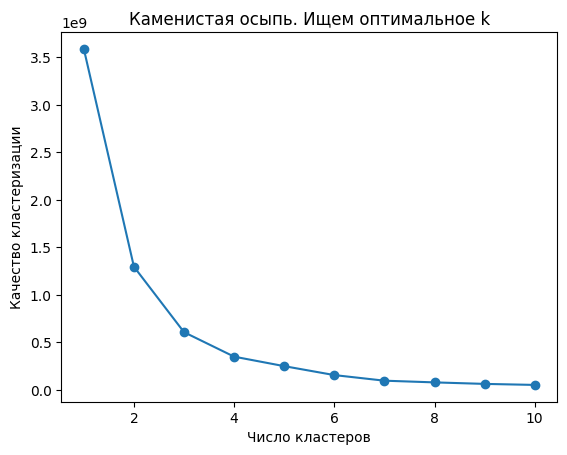

In [60]:
# Строим 10 моделей с числом кластеров от 1 до 10. 
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df1) for k in K]

#  Качество кластеризации вычисляется в model.inertia_
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
# Добавляем на график текст
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

По диаграмме каменистой осыпи визуально k=3

In [61]:
#  максимальное число итераций 
max_iter_1 = 300

In [62]:
model = KMeans(n_clusters=3, random_state=25, max_iter=max_iter_1, n_init=10, 
               verbose=0, tol=0.0001 )

In [63]:
# Кластеризация данных из таблицы df1
model.fit(df1)

KMeans(n_clusters=3, n_init=10, random_state=25)

In [64]:
#  Сколько итераций потребовалось процедуре?
model.n_iter_

4

In [65]:
df1['cluster_kmeans'] = model.labels_

In [66]:
df1['cluster_kmeans'].sort_values()

0      0
252    0
251    0
250    0
249    0
      ..
314    2
129    2
62     2
103    2
176    2
Name: cluster_kmeans, Length: 398, dtype: int32

In [67]:
df1 = df1.drop(columns = ['cluster_kmeans'],axis = 1)

In [68]:
model.fit(df1)

KMeans(n_clusters=3, n_init=10, random_state=25)